In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

In [181]:
data = pd.read_csv("bechdel_analysis_data_cleaned.csv")
data

,year,imdb,title,clean_test,binary,budget_2013$,domgross_2013$,intgross_2013$,adult,genres,prod_comps,overview,tagline
0,2013,tt1711425,21 &amp; Over,notalk,FAIL,13000000,25682380.0,42195766.0,False,Comedy,"Mandeville Films,Relativity Media,SkyLand Ente...",Brilliant student Jeff Chang has the most impo...,Finally.
1,2012,tt1343727,Dredd 3D,ok,PASS,45658735,13611086.0,41467257.0,False,"Action,Science Fiction","Rena Film,DNA Films,Reliance Big Entertainment...","In the future, America is a dystopian wastelan...",Judgement is coming
2,2013,tt2024544,12 Years a Slave,notalk,FAIL,20000000,53107035.0,158607035.0,False,"Drama,History","New Regency Pictures,Plan B Entertainment,Rive...","In the pre-Civil War United States, Solomon No...",The extraordinary true story of Solomon Northup
3,2013,tt1272878,2 Guns,notalk,FAIL,61000000,75612460.0,132493015.0,False,"Action,Comedy,Crime","Universal Pictures,Marc Platt Productions,EFO ...",A DEA agent and an undercover Naval Intelligen...,"2 Guns, 1 Bank."
4,2013,tt0453562,42,men,FAIL,40000000,95020213.0,95020213.0,False,Drama,"Warner Bros. Pictures,Legendary Pictures","The powerful story of Jackie Robinson, the leg...",The True Story of an American Legend
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,1971,tt0067741,Shaft,notalk,FAIL,305063707,404702718.0,616827003.0,False,"Action,Crime,Thriller","Shaft Productions,Metro-Goldwyn-Mayer",Cool black private eye John Shaft is hired by ...,The mob wanted Harlem back. They got shaft...u...
1766,1971,tt0067800,Straw Dogs,notalk,FAIL,143862856,59412143.0,64760273.0,False,"Crime,Drama,Thriller",ABC Pictures,"David Sumner, a mild-mannered academic from th...",Sometimes a man is forced to defend his honor.
1767,1971,tt0067116,The French Connection,notalk,FAIL,12659931,236848653.0,236848653.0,False,"Action,Crime,Thriller","D'Antoni Productions,Schine-Moore Productions,...",Tough narcotics detective 'Popeye' Doyle is in...,There are no rules and no holds barred when Po...
1768,1971,tt0067992,Willy Wonka &amp; the Chocolate Factory,men,FAIL,17263543,23018057.0,23018057.0,False,"Family,Fantasy,Comedy",David L. Wolper Productions,When eccentric candy man Willy Wonka promises ...,It's Scrumdidilyumptious!


In [149]:
data.corr()

,year,budget_2013$,domgross_2013$,intgross_2013$,adult
year,1.000000,0.079400,-0.287360,-0.135018,NaN
budget_2013$,0.079400,1.000000,0.461425,0.594122,NaN
domgross_2013$,-0.287360,0.461425,1.000000,0.927658,NaN
intgross_2013$,-0.135018,0.594122,0.927658,1.000000,NaN
adult,NaN,NaN,NaN,NaN,NaN


In [150]:
data.cov()

,year,budget_2013$,domgross_2013$,intgross_2013$,adult
year,8.039367e+01,3.915216e+07,-3.250089e+08,-3.441006e+08,0.0
budget_2013$,3.915216e+07,3.024433e+15,3.200960e+15,9.287108e+15,0.0
domgross_2013$,-3.250089e+08,3.200960e+15,1.591164e+16,3.326046e+16,0.0
intgross_2013$,-3.441006e+08,9.287108e+15,3.326046e+16,8.079151e+16,0.0
adult,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0


Convert the pass/fail string binary column to 1=pass and 0=fail.

In [182]:
pass_fail_data = pd.get_dummies(data.binary, prefix='binary')
pass_fail_data = pass_fail_data.drop("binary_FAIL", axis=1)
data.drop(columns=['binary'])
data.insert(5, "binary_PASS", pass_fail_data["binary_PASS"])
data_new = data
data_new

,year,imdb,title,clean_test,binary,binary_PASS,budget_2013$,domgross_2013$,intgross_2013$,adult,genres,prod_comps,overview,tagline
0,2013,tt1711425,21 &amp; Over,notalk,FAIL,0,13000000,25682380.0,42195766.0,False,Comedy,"Mandeville Films,Relativity Media,SkyLand Ente...",Brilliant student Jeff Chang has the most impo...,Finally.
1,2012,tt1343727,Dredd 3D,ok,PASS,1,45658735,13611086.0,41467257.0,False,"Action,Science Fiction","Rena Film,DNA Films,Reliance Big Entertainment...","In the future, America is a dystopian wastelan...",Judgement is coming
2,2013,tt2024544,12 Years a Slave,notalk,FAIL,0,20000000,53107035.0,158607035.0,False,"Drama,History","New Regency Pictures,Plan B Entertainment,Rive...","In the pre-Civil War United States, Solomon No...",The extraordinary true story of Solomon Northup
3,2013,tt1272878,2 Guns,notalk,FAIL,0,61000000,75612460.0,132493015.0,False,"Action,Comedy,Crime","Universal Pictures,Marc Platt Productions,EFO ...",A DEA agent and an undercover Naval Intelligen...,"2 Guns, 1 Bank."
4,2013,tt0453562,42,men,FAIL,0,40000000,95020213.0,95020213.0,False,Drama,"Warner Bros. Pictures,Legendary Pictures","The powerful story of Jackie Robinson, the leg...",The True Story of an American Legend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,1971,tt0067741,Shaft,notalk,FAIL,0,305063707,404702718.0,616827003.0,False,"Action,Crime,Thriller","Shaft Productions,Metro-Goldwyn-Mayer",Cool black private eye John Shaft is hired by ...,The mob wanted Harlem back. They got shaft...u...
1766,1971,tt0067800,Straw Dogs,notalk,FAIL,0,143862856,59412143.0,64760273.0,False,"Crime,Drama,Thriller",ABC Pictures,"David Sumner, a mild-mannered academic from th...",Sometimes a man is forced to defend his honor.
1767,1971,tt0067116,The French Connection,notalk,FAIL,0,12659931,236848653.0,236848653.0,False,"Action,Crime,Thriller","D'Antoni Productions,Schine-Moore Productions,...",Tough narcotics detective 'Popeye' Doyle is in...,There are no rules and no holds barred when Po...
1768,1971,tt0067992,Willy Wonka &amp; the Chocolate Factory,men,FAIL,0,17263543,23018057.0,23018057.0,False,"Family,Fantasy,Comedy",David L. Wolper Productions,When eccentric candy man Willy Wonka promises ...,It's Scrumdidilyumptious!


In [160]:
data_new.corr()

,year,binary_PASS,budget_2013$,domgross_2013$,intgross_2013$,adult
year,1.000000,0.085681,0.079400,-0.287360,-0.135018,NaN
binary_PASS,0.085681,1.000000,-0.150488,-0.111091,-0.096257,NaN
budget_2013$,0.079400,-0.150488,1.000000,0.461425,0.594122,NaN
domgross_2013$,-0.287360,-0.111091,0.461425,1.000000,0.927658,NaN
intgross_2013$,-0.135018,-0.096257,0.594122,0.927658,1.000000,NaN
adult,NaN,NaN,NaN,NaN,NaN,NaN


Observations:
- Low positive correlation between year and passing
- Low negative correlation between all monetary categories
- dom_gross_2013 had the largest correlation

### Domestic Gross Analysis

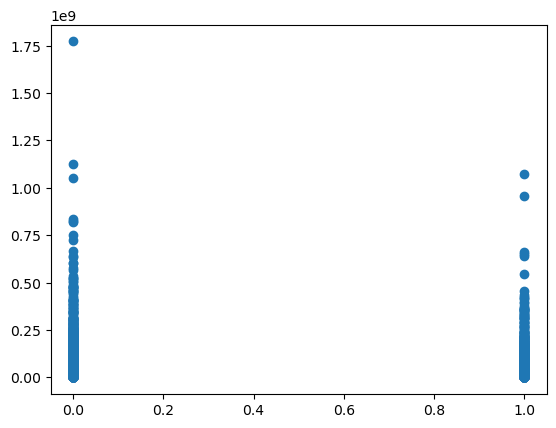

In [163]:
plt.scatter(data_new["binary_PASS"], data_new["domgross_2013$"])

In [168]:
data_fail = data_new.loc[data_new["binary_PASS"] == 0] 
data_pass = data_new.loc[data_new["binary_PASS"] == 1] 

Text(0, 0.5, '2013 Average Domestic Gross ($100 million)')

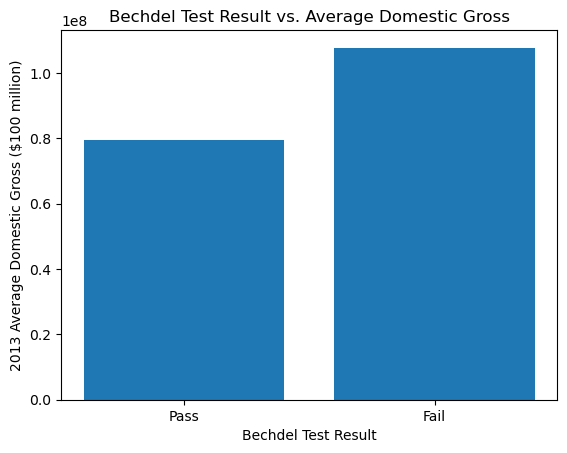

In [169]:
plt.bar(["Pass", "Fail"], [data_pass["domgross_2013$"].mean(), data_fail["domgross_2013$"].mean()])
plt.title("Bechdel Test Result vs. Average Domestic Gross")
plt.xlabel("Bechdel Test Result")
plt.ylabel("2013 Average Domestic Gross ($100 million)")

- There is a clear correlation between 2013 average domestic gross and Bechdel Test result


### Genre Analysis

In [183]:
data_new["genres"] = data_new["genres"].str.split(',')

In [184]:
mlb = MultiLabelBinarizer()
genre_data = pd.DataFrame(mlb.fit_transform(data_new["genres"]),
                          columns=mlb.classes_,
                          index=data_new.index)
genre_data

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1766,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1767,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1768,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0


In [37]:
genre_data.sum()

Action             496
Adventure          386
Animation          120
Comedy             661
Crime              268
Documentary          5
Drama              785
Family             207
Fantasy            233
History             72
Horror             197
Music               52
Mystery            154
Romance            328
Science Fiction    294
TV Movie             2
Thriller           463
War                 52
Western             25
dtype: int64

In [39]:
pass_fail_genre = pd.concat([pass_fail_data, genre_data], axis=1)

In [41]:
pass_fail_genre_corr = pass_fail_genre.corr()
pass_fail_genre_corr[["binary_PASS"]]

,binary_PASS
binary_PASS,1.000000
Action,-0.213527
Adventure,-0.130132
Animation,-0.052257
Comedy,0.063384
Crime,-0.112924
Documentary,-0.004960
Drama,0.070078
Family,0.023377
Fantasy,0.003380


- Genres with a clear positive correlation above 0.1 include romance and horror
- Genres with a clear negative correlation above 0.1 include action, adventure, and crime.

### Year Analysis

Text(0.5, 0, 'Year')

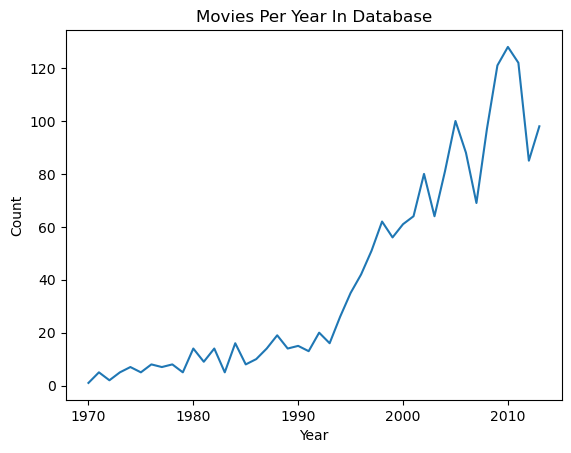

In [106]:
year_data = data_new[['binary_PASS','year']].groupby('year').count()
plt.plot(year_data.index,year_data['binary_PASS'])
plt.title("Movies Per Year In Database")
plt.ylabel("Count")
plt.xlabel("Year")

In [107]:
year_pass_data = data_new[data_new["binary_PASS"] == 1]
year_pass_data = year_pass_data[['binary_PASS','year']].groupby('year').count()
pass_percentage_data = year_pass_data / year_data
pass_percentage_data = pass_percentage_data.fillna(0)
pass_percentage_data

,binary_PASS
year,
1970,1.000000
1971,0.000000
1972,0.500000
1973,0.200000
1974,0.285714
1975,0.000000
1976,0.375000
1977,0.285714
1978,0.250000


Text(0.5, 0, 'Year')

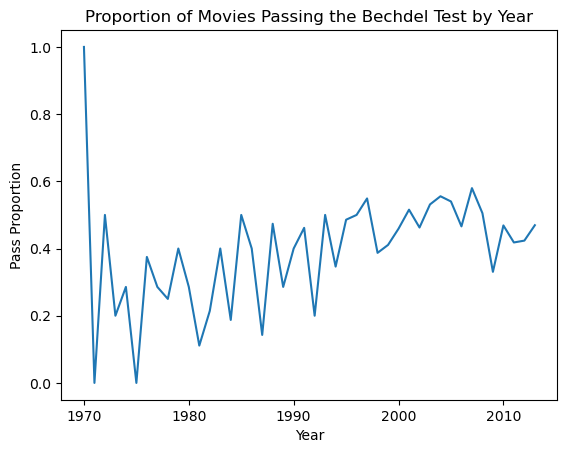

In [108]:
plt.plot(pass_percentage_data.index,pass_percentage_data['binary_PASS'])
plt.title("Proportion of Movies Passing the Bechdel Test by Year")
plt.ylabel("Pass Proportion")
plt.xlabel("Year")

- Pass rate fluctuated greatly by year in early years, likely because of the smaller sample size
- More recent rates stabilize
- Average pass rate slowly increases over time

### Adult Movie Analysis

In [174]:
adult_data = pd.get_dummies(data.adult, prefix='adult')
adult_data

,adult_False
0,1
1,1
2,1
3,1
4,1
...,...
1765,1
1766,1
1767,1
1768,1


No adult movies in the dataset :(

### Production Company Analysis

In [186]:
data_new["prod_comps"] = data_new["prod_comps"].str.split(',')
data_new

,year,imdb,title,clean_test,binary,binary_PASS,budget_2013$,domgross_2013$,intgross_2013$,adult,genres,prod_comps,overview,tagline
0,2013,tt1711425,21 &amp; Over,notalk,FAIL,0,13000000,25682380.0,42195766.0,False,[Comedy],"[Mandeville Films, Relativity Media, SkyLand E...",Brilliant student Jeff Chang has the most impo...,Finally.
1,2012,tt1343727,Dredd 3D,ok,PASS,1,45658735,13611086.0,41467257.0,False,"[Action, Science Fiction]","[Rena Film, DNA Films, Reliance Big Entertainm...","In the future, America is a dystopian wastelan...",Judgement is coming
2,2013,tt2024544,12 Years a Slave,notalk,FAIL,0,20000000,53107035.0,158607035.0,False,"[Drama, History]","[New Regency Pictures, Plan B Entertainment, R...","In the pre-Civil War United States, Solomon No...",The extraordinary true story of Solomon Northup
3,2013,tt1272878,2 Guns,notalk,FAIL,0,61000000,75612460.0,132493015.0,False,"[Action, Comedy, Crime]","[Universal Pictures, Marc Platt Productions, E...",A DEA agent and an undercover Naval Intelligen...,"2 Guns, 1 Bank."
4,2013,tt0453562,42,men,FAIL,0,40000000,95020213.0,95020213.0,False,[Drama],"[Warner Bros. Pictures, Legendary Pictures]","The powerful story of Jackie Robinson, the leg...",The True Story of an American Legend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,1971,tt0067741,Shaft,notalk,FAIL,0,305063707,404702718.0,616827003.0,False,"[Action, Crime, Thriller]","[Shaft Productions, Metro-Goldwyn-Mayer]",Cool black private eye John Shaft is hired by ...,The mob wanted Harlem back. They got shaft...u...
1766,1971,tt0067800,Straw Dogs,notalk,FAIL,0,143862856,59412143.0,64760273.0,False,"[Crime, Drama, Thriller]",[ABC Pictures],"David Sumner, a mild-mannered academic from th...",Sometimes a man is forced to defend his honor.
1767,1971,tt0067116,The French Connection,notalk,FAIL,0,12659931,236848653.0,236848653.0,False,"[Action, Crime, Thriller]","[D'Antoni Productions, Schine-Moore Production...",Tough narcotics detective 'Popeye' Doyle is in...,There are no rules and no holds barred when Po...
1768,1971,tt0067992,Willy Wonka &amp; the Chocolate Factory,men,FAIL,0,17263543,23018057.0,23018057.0,False,"[Family, Fantasy, Comedy]",[David L. Wolper Productions],When eccentric candy man Willy Wonka promises ...,It's Scrumdidilyumptious!


In [189]:
# mlb = MultiLabelBinarizer()
# prod_data = pd.DataFrame(mlb.fit_transform(data_new["prod_comps"]),
#                           columns=mlb.classes_,
#                           index=data_new.index)
# prod_data